In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
airlines = pd.read_csv('airlines.csv', header=None, names=['id', 'name', 'alias', 'iata', 'icao', 'callsign', 'country', 'active'])
airports = pd.read_csv('airports.csv', header=None, names=['id', 'name', 'city', 'country', 'code', 'icao', 'latitude', 'longitude', 'altitude', 'offset', 'dst', 'timezone'])
routes  = pd.read_csv('routes.csv', header=None, names=['airline', 'airline_id', 'source', 'source_id', 'dest', 'dest_id', 'codeshare', 'stops', 'equipment'])

In [3]:
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [4]:
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


In [5]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [6]:
print(airports['latitude'].head(3))
print(airports['longitude'].head(3))

0   -6.081689
1   -5.207083
2   -5.826789
Name: latitude, dtype: float64
0    145.391881
1    145.788700
2    144.295861
Name: longitude, dtype: float64


In [7]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

In [8]:
# Convert from Series objects to List objects.
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()

# Convert latitude and longitude to x and y coordinates.
x, y = m(longitudes, latitudes)

# Display original longitude values
print(longitudes[0:5])
# Display original latitude values
print(latitudes[0:5])
# Display x-axis coordinates
print(x[0:5])
# Display y-axis coordinates
print(y[0:5])

[145.39188100000001, 145.78870000000001, 144.295861, 146.72624199999998, 147.22004999999999]
[-6.0816889999999999, -5.2070829999999999, -5.8267889999999998, -6.5698280000000002, -9.4433830000000007]
[36181909.301050939, 36226033.539869711, 36060037.494937442, 36330283.404696316, 36385192.323177092]
[14843790.192350345, 14941516.685582709, 14872287.531036133, 14789178.97017778, 14466473.84037962]


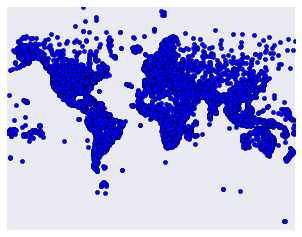

In [9]:
m.scatter(x, y)
plt.show()

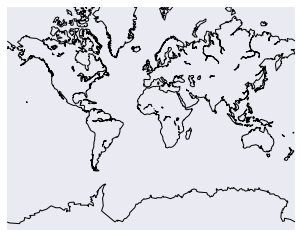

In [10]:
m.drawcoastlines()
plt.show()

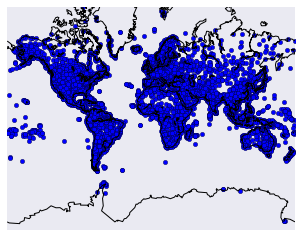

In [11]:
m.scatter(x, y)
m.drawcoastlines()
plt.show()

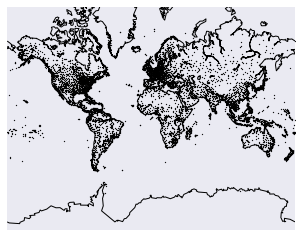

In [12]:
m.scatter(x, y, c='black', s=1, marker='o')
m.drawcoastlines()
plt.show()

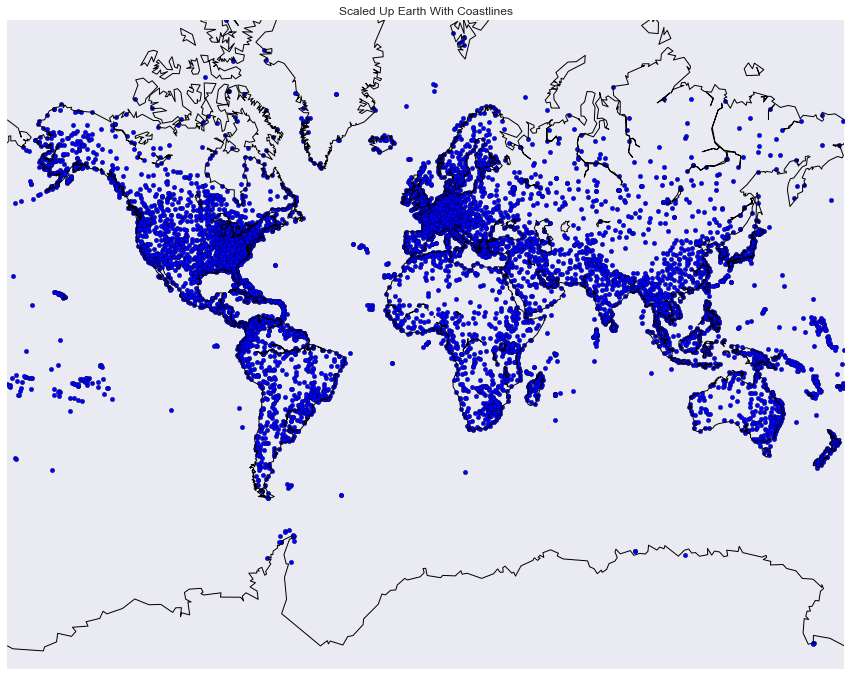

In [13]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Scaled Up Earth With Coastlines')
m.scatter(x, y)
m.drawcoastlines()
plt.show()

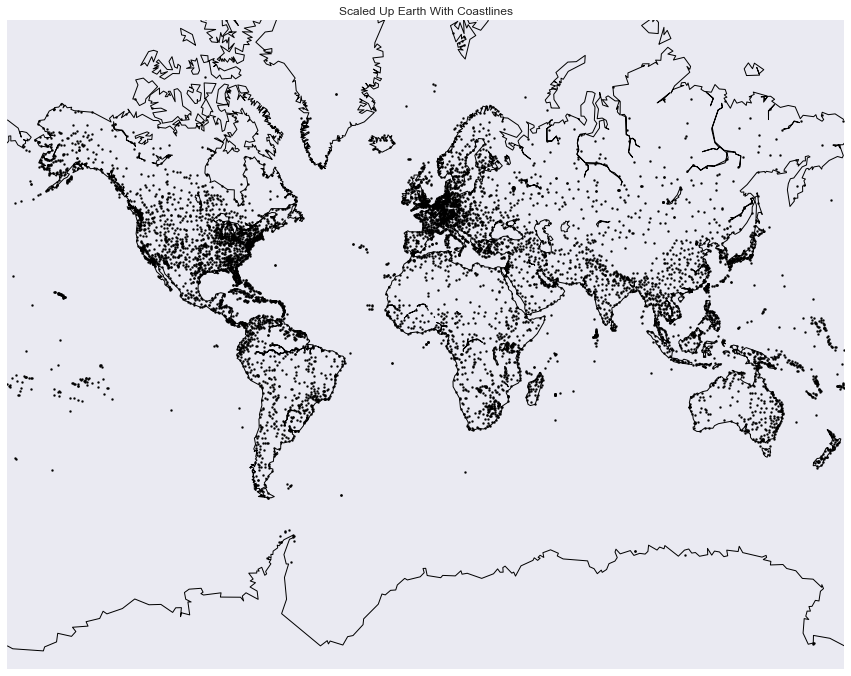

In [14]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Scaled Up Earth With Coastlines')
m.scatter(x, y, c='black', s=4, marker='o')
m.drawcoastlines()
plt.show()

In [15]:
airports_codes = airports[['code', 'latitude', 'longitude']]
airports_codes.head()

,code,latitude,longitude
0,GKA,-6.081689,145.391881
1,MAG,-5.207083,145.788700
2,HGU,-5.826789,144.295861
3,LAE,-6.569828,146.726242
4,POM,-9.443383,147.220050


In [16]:
sliced_routes = routes[['airline', 'source', 'dest', 'equipment']]
sliced_routes.head()
processed_routes = sliced_routes.merge(airports_codes, left_on='source', right_on='code')
processed_routes.rename(columns={'latitude': 'start_lat', 'longitude': 'start_lon'}, inplace=True)
geo_routes = processed_routes.merge(airports_codes, left_on='dest', right_on='code')
geo_routes.rename(columns={'latitude': 'end_lat', 'longitude': 'end_lon'}, inplace=True)
geo_routes.drop(['code_x', 'code_y'], axis=1, inplace=True)
geo_routes.head()

,airline,source,dest,equipment,start_lat,start_lon,end_lat,end_lon
0,2B,AER,KZN,CR2,43.449928,39.956589,55.606186,49.278728
1,2B,ASF,KZN,CR2,46.283333,48.006278,55.606186,49.278728
2,2B,CEK,KZN,CR2,55.305836,61.503333,55.606186,49.278728
3,2B,DME,KZN,CR2,55.408611,37.906111,55.606186,49.278728
4,S7,DME,KZN,319,55.408611,37.906111,55.606186,49.278728


In [17]:
def create_great_circles(df):
  for index, row in df.iterrows():
    start_lon = row['start_lon']
    start_lat = row['start_lat']
    end_lon = row['end_lon']
    end_lat = row['end_lat']
    if abs(end_lat - start_lat) < 180 and abs(end_lon - start_lon) < 180:
      m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat, linewidth=1)

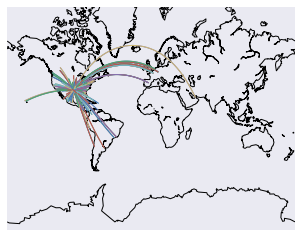

In [18]:
m.drawcoastlines()
dfw = geo_routes[geo_routes['source'] == 'DFW']
create_great_circles(dfw)
plt.show()

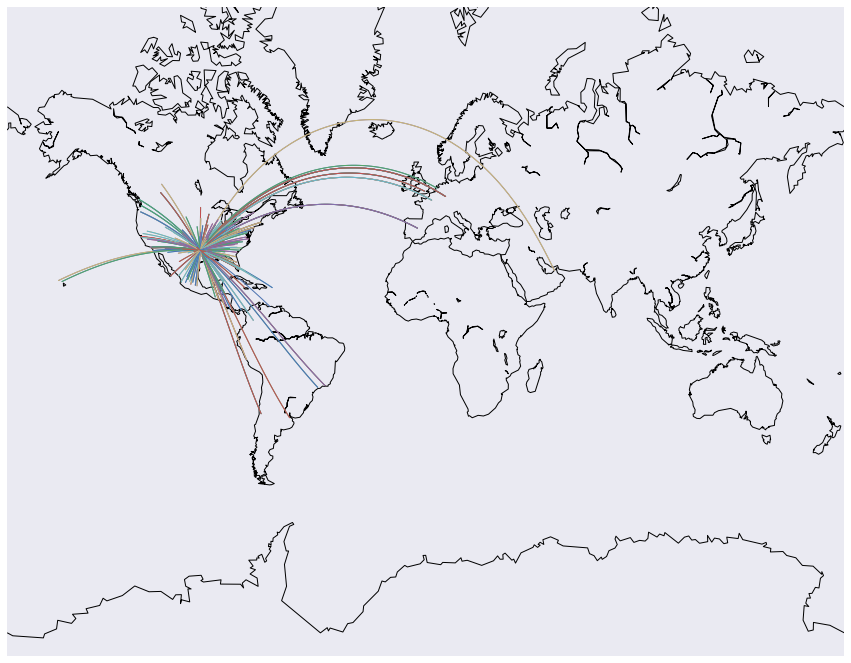

In [19]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(1, 1, 1)
m.drawcoastlines()
dfw = geo_routes[geo_routes['source'] == 'DFW']
create_great_circles(dfw)
plt.show()

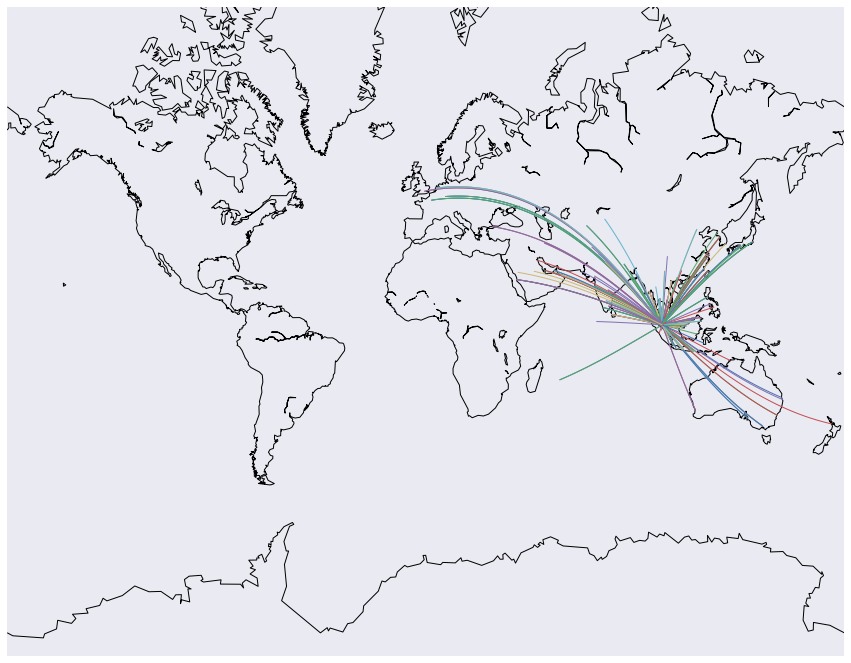

In [20]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(1, 1, 1)
m.drawcoastlines()
kul = geo_routes[geo_routes['source'] == 'KUL']
create_great_circles(kul)
plt.show()

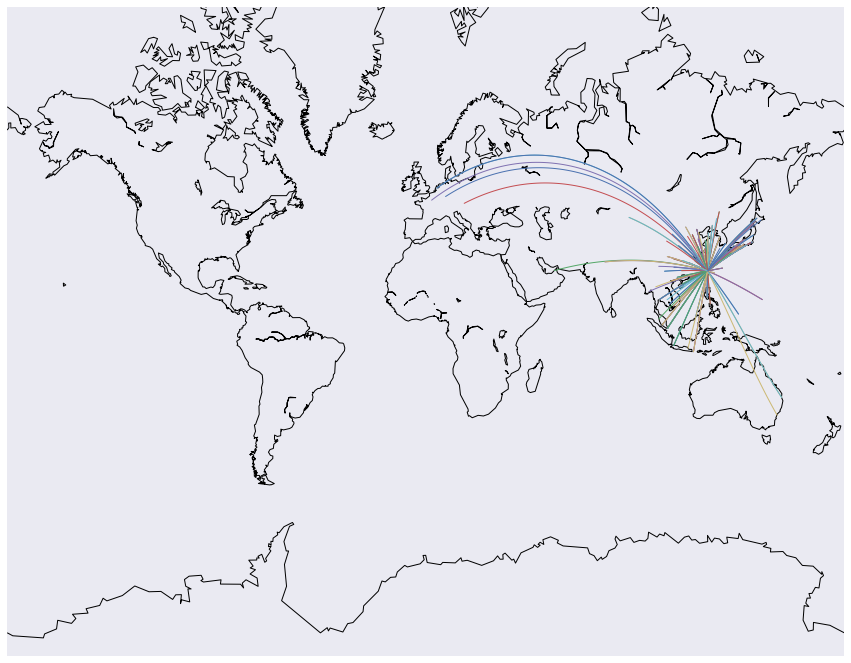

In [21]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(1, 1, 1)
m.drawcoastlines()
tpe = geo_routes[geo_routes['source'] == 'TPE']
create_great_circles(tpe)
plt.show()

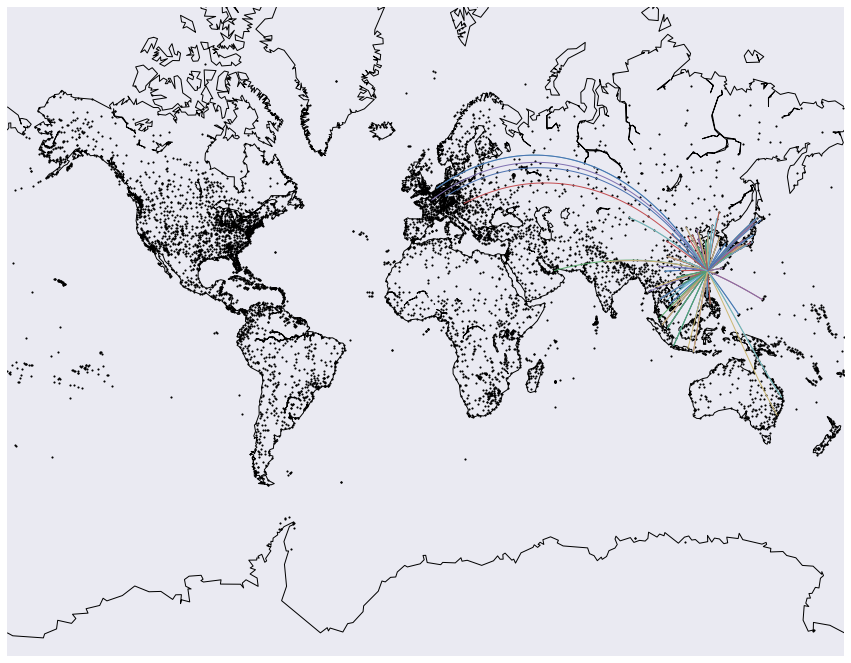

In [22]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(1, 1, 1)
m.scatter(x, y, c='black', s=3, marker='o')
m.drawcoastlines()
tpe = geo_routes[geo_routes['source'] == 'TPE']
create_great_circles(tpe)
plt.show()